<a href="https://colab.research.google.com/github/samuelajala01/gold_price_forecast/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv('/content/drive/MyDrive/Copy of gold_monthly_csv.csv')
df.tail()

,Date,Price
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032
846,2020-07,1840.807


In [26]:
df.shape

(847, 2)

## Exploratory Data Analysis

In [27]:
print(f"Date range of gold prices from {df.loc[:,'Date'][0]} to {df.loc[:, 'Date'][len(df) - 1]}")

Date range of gold prices from 1950-01 to 2020-07


In [29]:
date = pd.date_range(start = '1/1/1950', end = '8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [30]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [31]:
df['month'] = date
df.head()

,Date,Price,month
0,1950-01,34.73,1950-01-31
1,1950-02,34.73,1950-02-28
2,1950-03,34.73,1950-03-31
3,1950-04,34.73,1950-04-30
4,1950-05,34.73,1950-05-31


In [32]:
df.drop("Date", axis=1, inplace=True)
df.head()

,Price,month
0,34.73,1950-01-31
1,34.73,1950-02-28
2,34.73,1950-03-31
3,34.73,1950-04-30
4,34.73,1950-05-31


In [33]:
df = df.set_index("month")
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


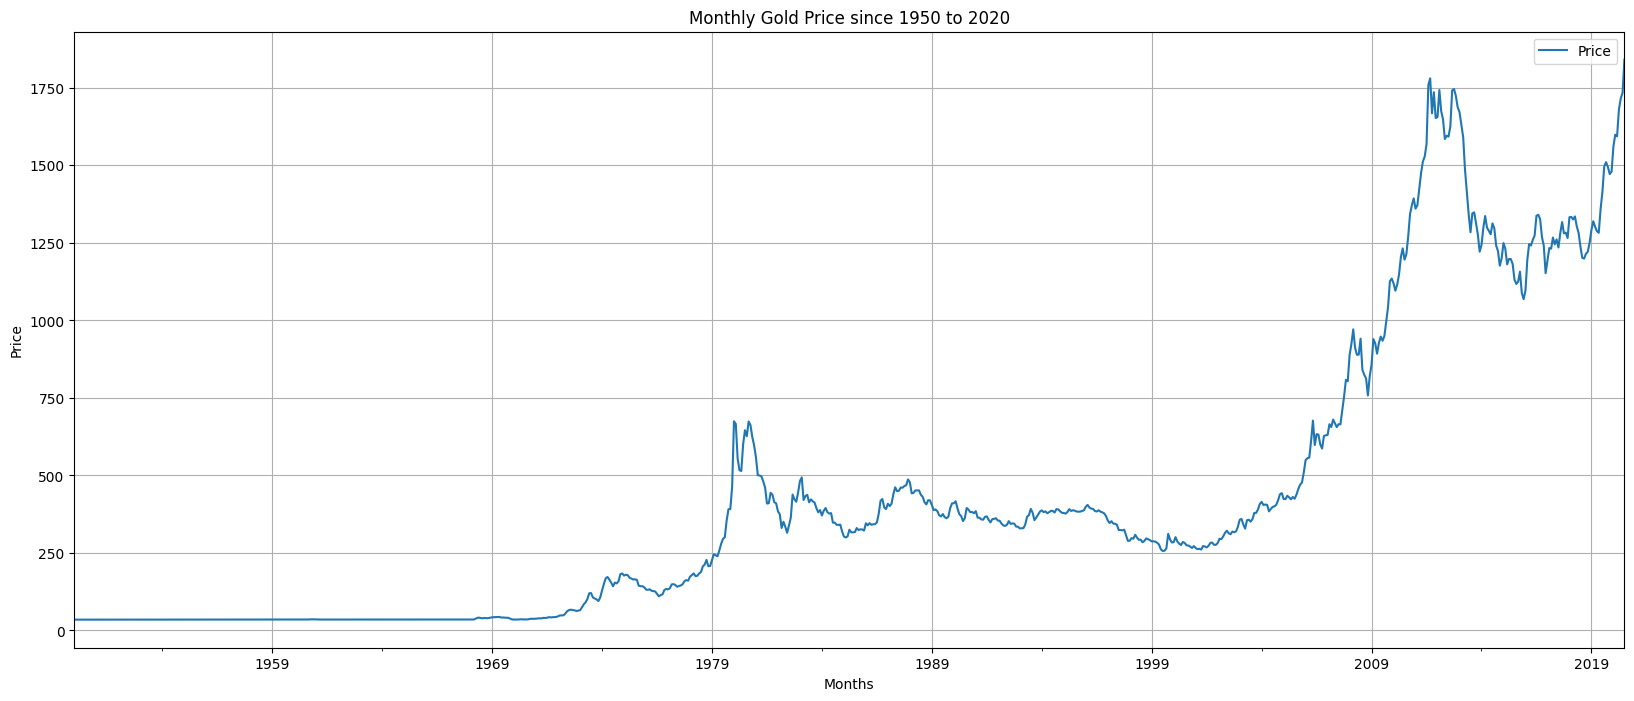

In [42]:
df.plot(figsize=(20,8))
plt.title("Monthly Gold Price since 1950 to 2020")
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid()

In [46]:
round(df.describe(), 3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


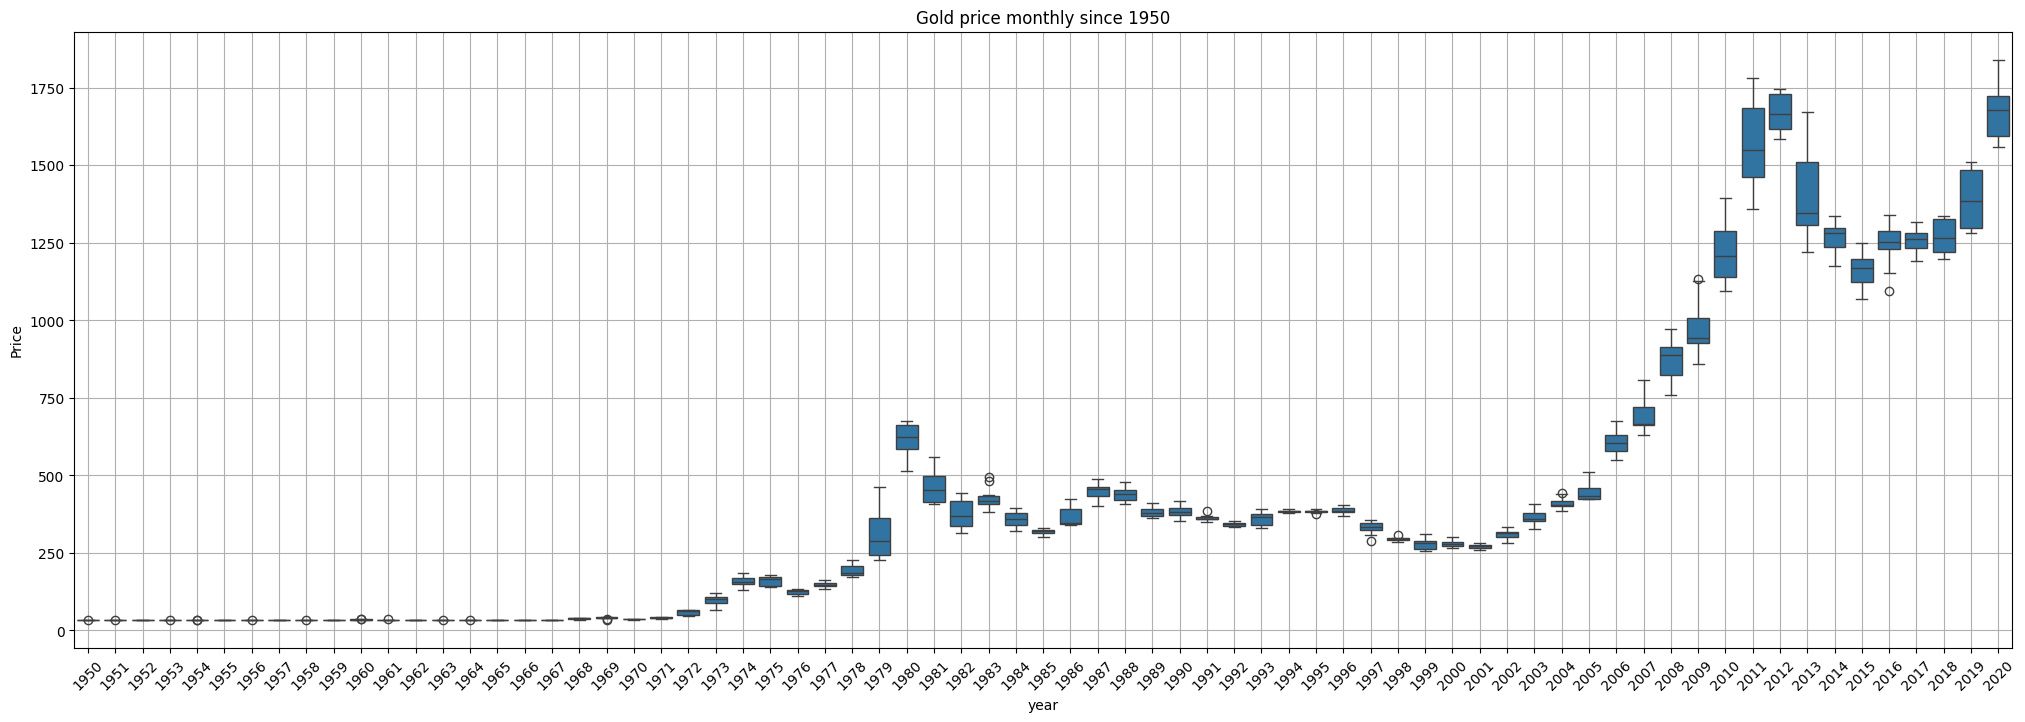

In [49]:
_, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x=df.index.year, y=df.values[:,0], ax=ax)
plt.title("Gold price monthly since 1950")
plt.xlabel("year")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid()

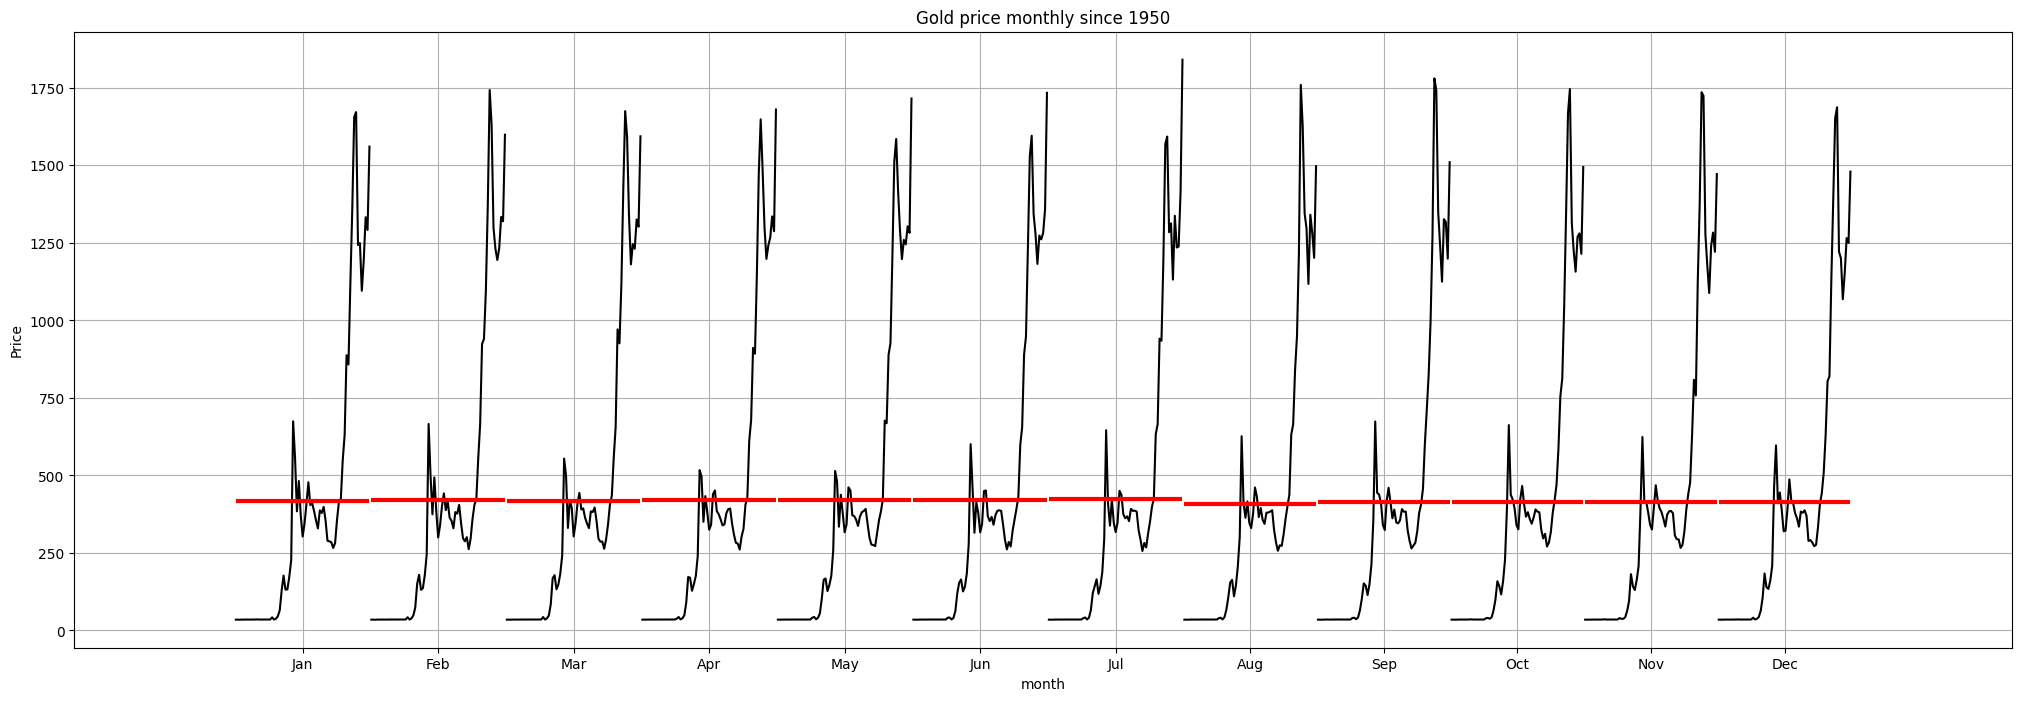

In [50]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(25, 8))
month_plot(df,  ylabel = "gold price", ax=ax)
plt.title("Gold price monthly since 1950")
plt.xlabel("month")
plt.ylabel("Price")
plt.grid()

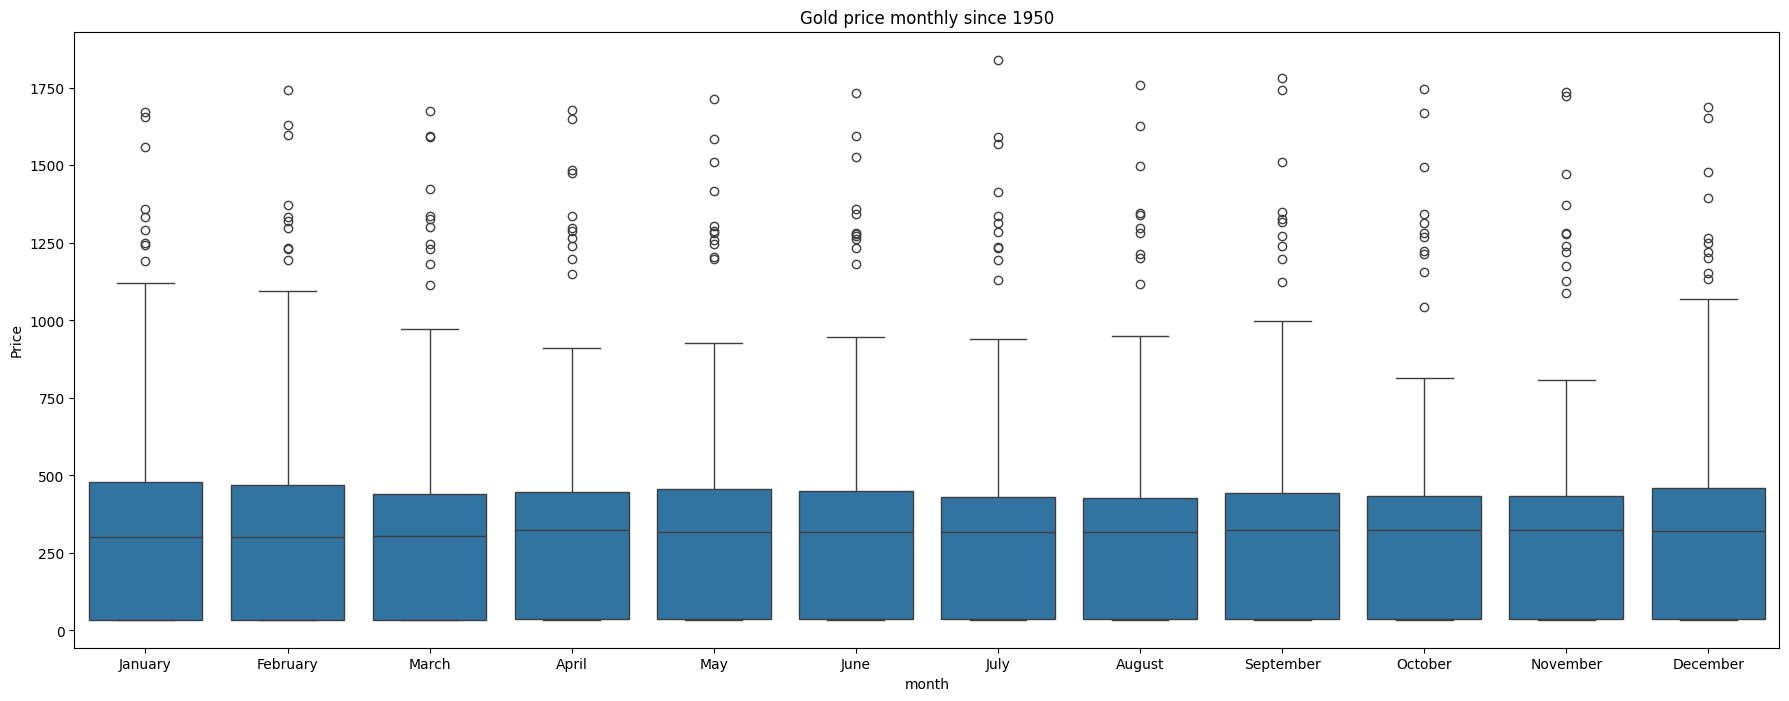

In [54]:
_, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x=df.index.month_name(), y=df.values[:,0], ax=ax)
plt.title("Gold price monthly since 1950")
plt.xlabel("month")
plt.ylabel("Price")
plt.show()

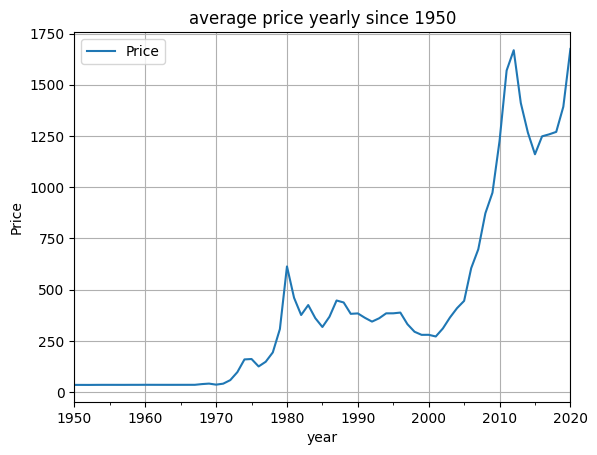

In [56]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title("average price yearly since 1950")
plt.xlabel("year")
plt.ylabel("Price")
plt.grid()

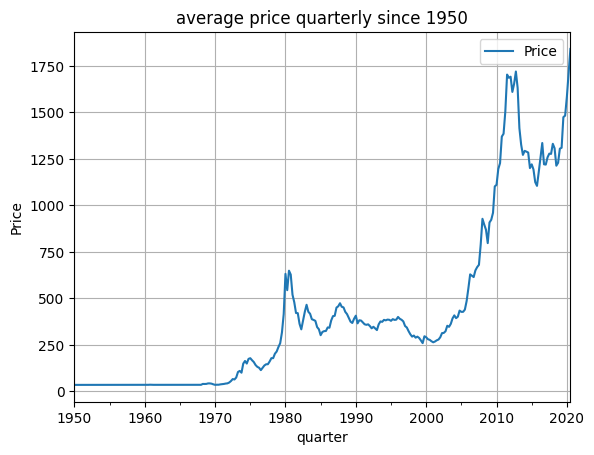

In [57]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title("average price quarterly since 1950")
plt.xlabel("quarterly")
plt.ylabel("Price")
plt.grid()

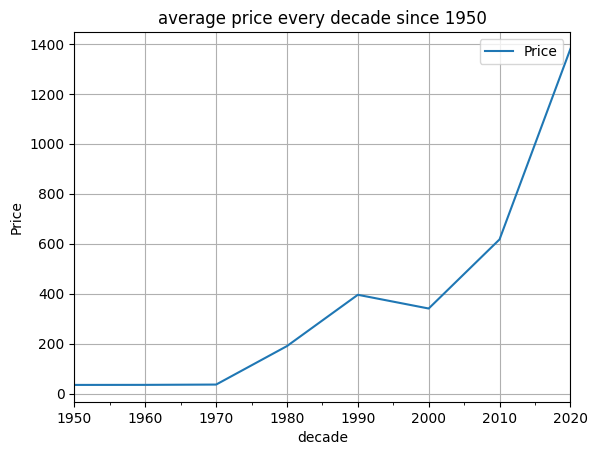

In [58]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title("average price every decade since 1950")
plt.xlabel("decade")
plt.ylabel("Price")
plt.grid()

In [64]:
df_1 = df.groupby(df.index.year).mean().rename(columns= {'Price': 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={"Price": "STD"}), left_index = True, right_index = True)
df_1['Cov_pct'] = ((df_1['STD']/df_1["Mean"])*100).round(2)
df_1.head()

,Mean,STD,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24
